## Imagenes satelitáles
# Recetas RGB
_Mario Guerra, Octubre 2023_


Satpy es un paquete que permite al usuario crear imagenes a partir de recetas RGB establecidas en productos como los [Quick Guides de RAMBB/CIRA](https://rammb.cira.colostate.edu/training/visit/quick_guides/). En Este notebook se describe como hacer la receta para producto de ceniza de GOES (a través de satpy, donde es una receta predeterminada). Al consultar la guia para la [receta de ceniza de RAMM/CIRA](https://rammb.cira.colostate.edu/training/visit/quick_guides/GOES_Ash_RGB.pdf), se establece que se neceta informacion de radiancia de en longitudes de onda 12.3 um, 11.2 um, 10.3 um y 8.4 um los cuales corresponden a los canales 15, 14, 13 y 11 de GOES respectivamente.

Empezamos descargando estos canales y cargadolos en una escena de satpy se puede revelar que recetas estan disponibles a traves de la función <span style="color:#93CDCA">scn</span>.<span style="color:#DCDDAD">available_composite_names</span><span style="color:#EBD337">()</span>. 

In [35]:
# En este ejemplo se utilizara en el entorno satpy-test.yml, por ende se recomienda correr las celdas de códico con el kernel correcto
import GOES as JOAOGOES # le cambio nombre al paquete dentro del código para evitar confuciones con el paquete goes2go, utilizado en otros productos
import datetime as dt # para obtener el tiempo actual y a base de eso obtener las datos más recientes
import os
# import time

#time.sleep(90) # en la versión real de este script se deja esperar un poco de tiempo ya que cron es ejectutado exactamente a */10 * * * * UTC, cuando los productos todavía no existen
#timenow = dt.datetime.now(dt.timezone.utc) # tiempo al momento de ejecutar código
chnls = ['15','12','13','11','14'] # descargamos los canales mencionados anteriormente
path_ABI_nc = './ABI-L1b-RadF/'

timeinitstr =  dt.datetime(year=2023, month=5, day=4, hour=13, minute=9).strftime('%Y%m%d-%H%M%S') # vamos a usar el 4 de mayo 2023 a las 13 UTC para este ejemplo
timefinalstr = dt.datetime(year=2023, month=5, day=4, hour=13, minute=19).strftime('%Y%m%d-%H%M%S') 



filelist = []
for ch in chnls:
   if not os.path.exists(path_ABI_nc +f"C{ch}"):
                os.makedirs(path_ABI_nc +f"C{ch}") # organize the NetCDFs in neat little folders
                                                   # cause we are organized neat little people
   flist = JOAOGOES.download('goes16', 'ABI-L1b-RadF', channel=[ch],
                           DateTimeIni = timeinitstr, DateTimeFin = timefinalstr, 
                           path_out= path_ABI_nc +f"C{ch}/")
   if flist:
    filelist.append(flist[0])


Files:
  OR_ABI-L1b-RadF-M6C15_G16_s20231241310205_e20231241319519_c20231241319556.nc 100% 25.5MB 3s
Files:
  OR_ABI-L1b-RadF-M6C12_G16_s20231241310205_e20231241319521_c20231241319563.nc 100% 21.7MB 2s
Files:
  OR_ABI-L1b-RadF-M6C13_G16_s20231241310205_e20231241319528_c20231241319570.nc 100% 25.9MB 3s
Files:
  OR_ABI-L1b-RadF-M6C11_G16_s20231241310205_e20231241319513_c20231241319559.nc 100% 25.6MB 3s
Files:
  OR_ABI-L1b-RadF-M6C14_G16_s20231241310205_e20231241319513_c20231241319576.nc 100% 25.8MB 3s


A diferencia de el ejemplo previo ahora que se descargaron varios canales <span style="color:#93CDCA">filelist</span>  es ahora un array con los nombres de los paths a los NetCDFs

In [36]:
filelist

['./ABI-L1b-RadF/C15/OR_ABI-L1b-RadF-M6C15_G16_s20231241310205_e20231241319519_c20231241319556.nc',
 './ABI-L1b-RadF/C12/OR_ABI-L1b-RadF-M6C12_G16_s20231241310205_e20231241319521_c20231241319563.nc',
 './ABI-L1b-RadF/C13/OR_ABI-L1b-RadF-M6C13_G16_s20231241310205_e20231241319528_c20231241319570.nc',
 './ABI-L1b-RadF/C11/OR_ABI-L1b-RadF-M6C11_G16_s20231241310205_e20231241319513_c20231241319559.nc',
 './ABI-L1b-RadF/C14/OR_ABI-L1b-RadF-M6C14_G16_s20231241310205_e20231241319513_c20231241319576.nc']

cargamos los canales a una escena de satpy y consultamos las recetas disponibles

In [37]:
from satpy import Scene

scn = Scene(filenames=filelist, reader='abi_l1b')

scn.load(['C15','C12','C13','C11','C14'] )


for i in scn.available_composite_names():
 print(i,end="\t\t")
print(" ")


ash		colorized_ir_clouds		dust		fog		highlight_C14		ir108_3d		ir_cloud_day		 


Aparte de 'ash' se puede apreciar que exiten otras recetas que utilizan estos canales. En específico 'dust' y 'ash' usan exactamente los mismas combinaciones de diferenca de canales y datos crudos pero con combinaciones RGB diferentes. Para crear la imagen es necesario cargar el compuesto 'ash' a la escena.

In [38]:
scn.load(['ash'])
scn['ash']

<xarray.DataArray 'where-8620bdeaa1f8c465ec0ca4fb711bcbf5' (bands: 3, y: 5424,
                                                            x: 5424)>
dask.array<where, shape=(3, 5424, 5424), dtype=float64, chunksize=(1, 4096, 4096), chunktype=numpy.ndarray>
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["unknown",E...
  * y        (y) float64 5.434e+06 5.432e+06 5.43e+06 ... -5.432e+06 -5.434e+06
  * x        (x) float64 -5.434e+06 -5.432e+06 -5.43e+06 ... 5.432e+06 5.434e+06
  * bands    (bands) <U1 'R' 'G' 'B'
Attributes:
    platform_shortname:      G16
    cell_methods:            t: point area: point
    sensor:                  abi
    scene_id:                Full Disk
    reader:                  abi_l1b
    scene_abbr:              F
    area:                    Area ID: GOES-East\nDescription: 2km at nadir\nP...
    observation_type:        Rad
    sensor_band_bit_depth:   12
    scan_mode:               M6
    end_time:                2023-05-04 13:19:52.150000
    orbital_parameters:      {'projection_longitude': -75.0, 'projection_lati...
    start_time:              2023-05-04 13:10:20.500000
    grid_mapping:            goes_imager_projection
    platform_name:           GOES-16
    production_site:         WCDAS
    ancillary_variables:     []
    orbital_slot:            GOES-East
    instrument_ID:           FM1
    long_name:               Brightness Temperature
    timeline_ID:             None
    resolution:              2000
    standard_name:           ash
    wavelength:              None
    optional_datasets:       []
    name:                    ash
    _satpy_id:               DataID(name='ash', resolution=2000)
    description:             Ash RGB, for GOESR: NASA, NOAA\n
    references:              {'CIRA Quick Guide': 'https://rammb.cira.colosta...
    prerequisites:           [DataQuery(name='_ash_dep_0'), DataQuery(name='_...
    optional_prerequisites:  []
    mode:                    RGB

ahora <span style="color:#93CDCA">scn</span><span style="color:#EBD337">[</span> <span style="color:#C17D5C">'ash'</span><span style="color:#EBD337">]</span> puede ser ploteado de la misma manera que hicimos en el primer ejemplo con el canal 02.

In [39]:
import cartopy.io.shapereader as shpreader
from cartopy import crs as ccrs, feature as cfeature
import matplotlib.pyplot as plt
from satpy.writers import get_enhanced_image

var = get_enhanced_image(scn['ash']).data #convertir datos a un array RGB
var = var.transpose('y', 'x', 'bands') 

#var = scn['ash'] # Se sacan datos a partir de canal 02, con resolución requerida 
strs = var.attrs # Metadatos de C02
projPC = var.attrs['area'].to_cartopy_crs() # Proyección usada por ABI-L1b-RadF

strs

{'platform_shortname': 'G16',
 'cell_methods': 't: point area: point',
 'sensor': 'abi',
 'scene_id': 'Full Disk',
 'reader': 'abi_l1b',
 'scene_abbr': 'F',
 'area': Area ID: GOES-East
 Description: 2km at nadir
 Projection ID: abi_fixed_grid
 Projection: {'ellps': 'GRS80', 'h': '35786023', 'lon_0': '-75', 'no_defs': 'None', 'proj': 'geos', 'sweep': 'x', 'type': 'crs', 'units': 'm', 'x_0': '0', 'y_0': '0'}
 Number of columns: 5424
 Number of rows: 5424
 Area extent: (-5434894.8851, -5434894.8851, 5434894.8851, 5434894.8851),
 'observation_type': 'Rad',
 'sensor_band_bit_depth': 12,
 'scan_mode': 'M6',
 'end_time': datetime.datetime(2023, 5, 4, 13, 19, 52, 150000),
 'orbital_parameters': {'projection_longitude': -75.0,
  'projection_latitude': 0.0,
  'projection_altitude': 35786023.0,
  'satellite_nominal_latitude': 0.0,
  'satellite_nominal_longitude': -75.19999694824219,
  'satellite_nominal_altitude': 35786023.4375,
  'yaw_flip': False},
 'start_time': datetime.datetime(2023, 5, 4, 1

In [40]:
var

<xarray.DataArray 'where-8620bdeaa1f8c465ec0ca4fb711bcbf5' (y: 5424, x: 5424,
                                                            bands: 3)>
dask.array<transpose, shape=(5424, 5424, 3), dtype=float64, chunksize=(4096, 4096, 1), chunktype=numpy.ndarray>
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["unknown",E...
  * y        (y) float64 5.434e+06 5.432e+06 5.43e+06 ... -5.432e+06 -5.434e+06
  * x        (x) float64 -5.434e+06 -5.432e+06 -5.43e+06 ... 5.432e+06 5.434e+06
  * bands    (bands) <U1 'R' 'G' 'B'
Attributes:
    platform_shortname:      G16
    cell_methods:            t: point area: point
    sensor:                  abi
    scene_id:                Full Disk
    reader:                  abi_l1b
    scene_abbr:              F
    area:                    Area ID: GOES-East\nDescription: 2km at nadir\nP...
    observation_type:        Rad
    sensor_band_bit_depth:   12
    scan_mode:               M6
    end_time:                2023-05-04 13:19:52.150000
    orbital_parameters:      {'projection_longitude': -75.0, 'projection_lati...
    start_time:              2023-05-04 13:10:20.500000
    grid_mapping:            goes_imager_projection
    platform_name:           GOES-16
    production_site:         WCDAS
    ancillary_variables:     []
    orbital_slot:            GOES-East
    instrument_ID:           FM1
    long_name:               Brightness Temperature
    timeline_ID:             None
    resolution:              2000
    standard_name:           ash
    wavelength:              None
    optional_datasets:       []
    name:                    ash
    _satpy_id:               DataID(name='ash', resolution=2000)
    description:             Ash RGB, for GOESR: NASA, NOAA\n
    references:              {'CIRA Quick Guide': 'https://rammb.cira.colosta...
    prerequisites:           [DataQuery(name='_ash_dep_0'), DataQuery(name='_...
    optional_prerequisites:  []
    mode:                    RGB
    enhancement_history:     [{'scale': <xarray.DataArray (bands: 3)>\narray(...

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


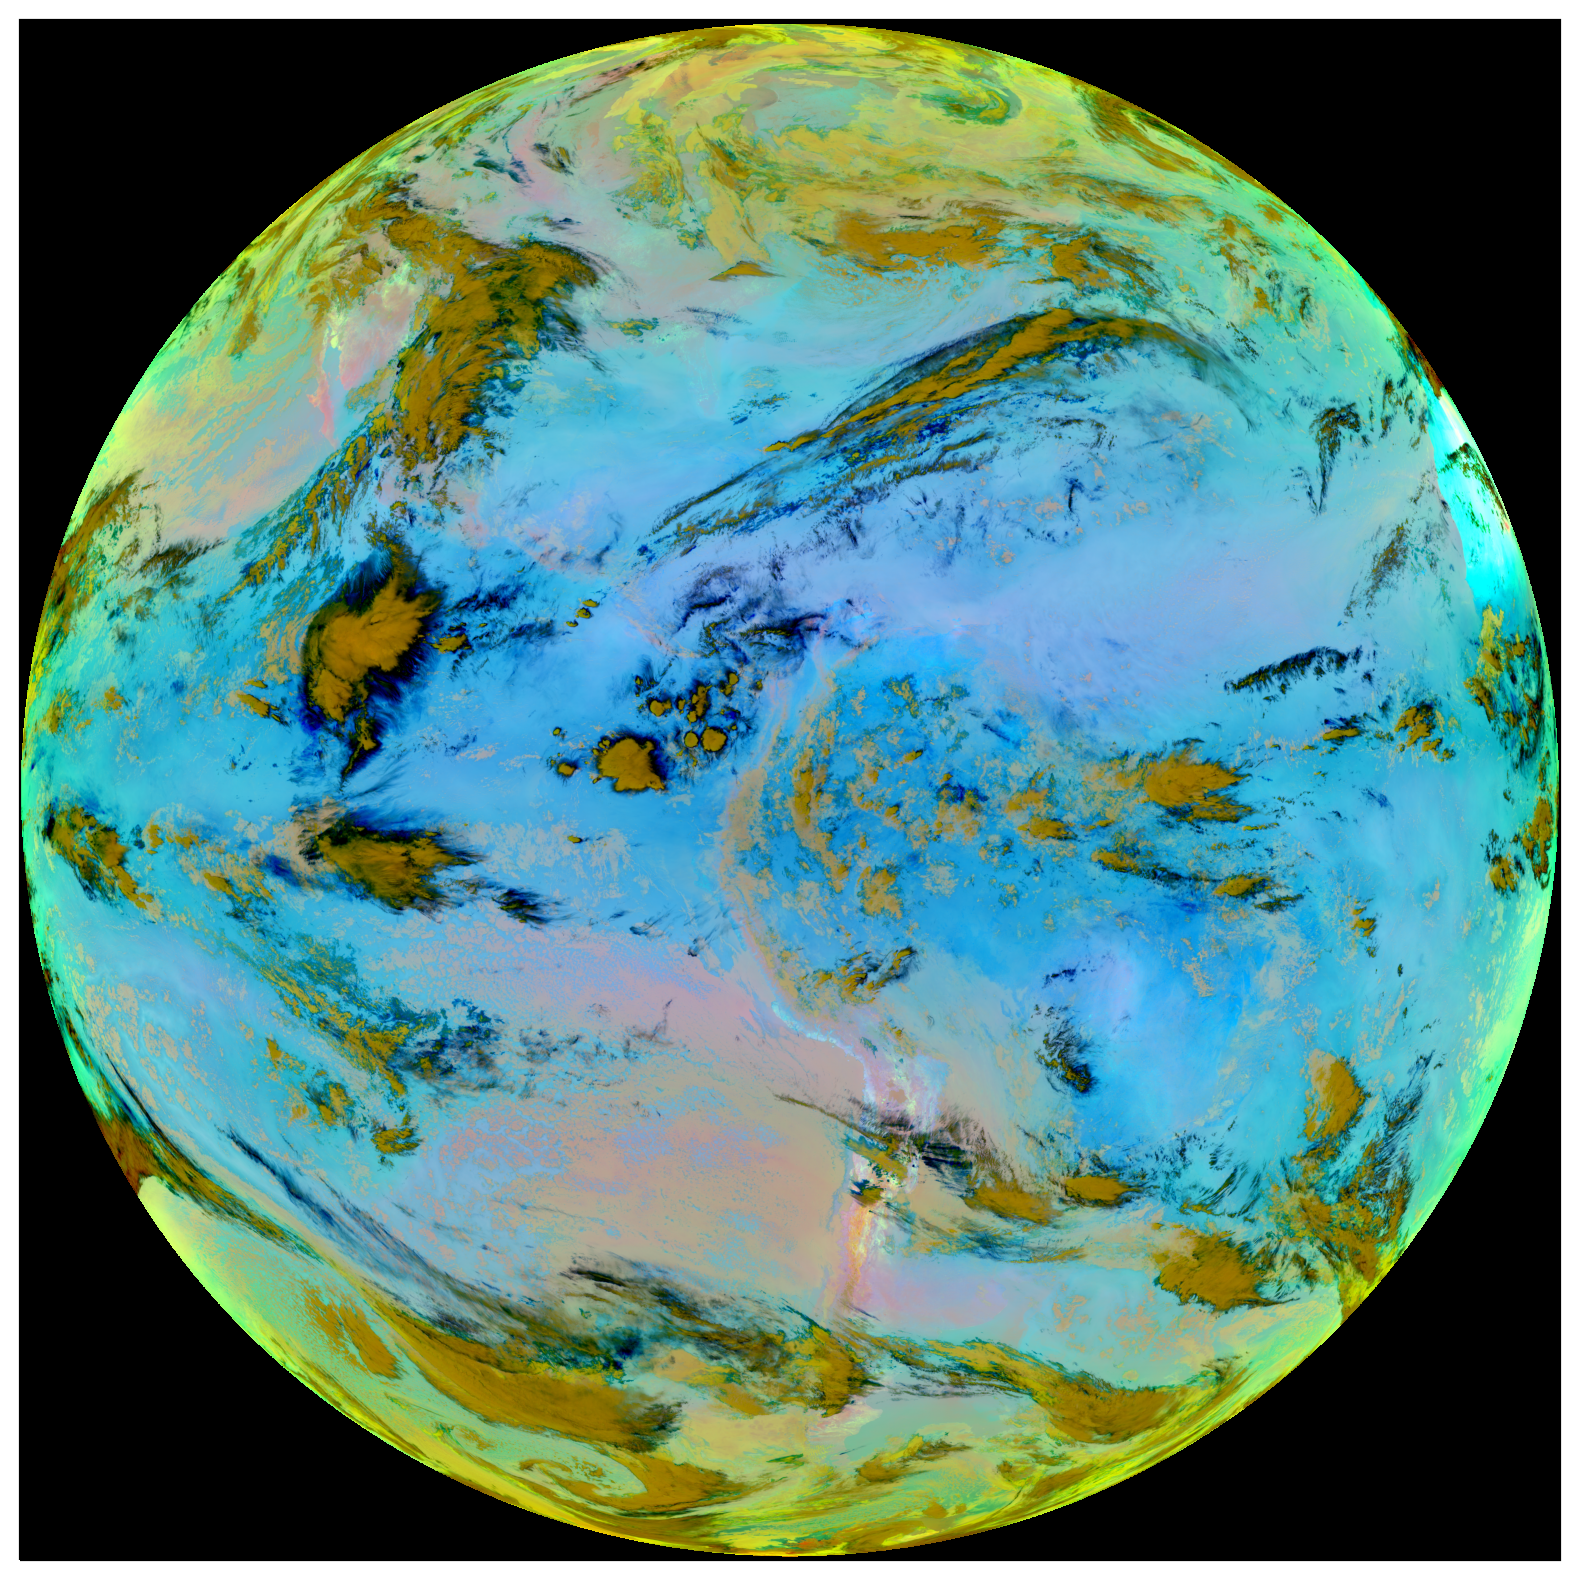

In [41]:
fig = plt.figure(figsize=(10, 10), dpi=200)
ax = fig.add_subplot(1, 1, 1, projection=projPC) # lo que diferencia un ax de matplotlib regular a un ax de cartopy es el argumento "projection"
img = ax.imshow(var.data, extent=(var.x[0], var.x[-1], var.y[-1], var.y[0]), origin='upper') # se plotea todos los datos disponibles
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


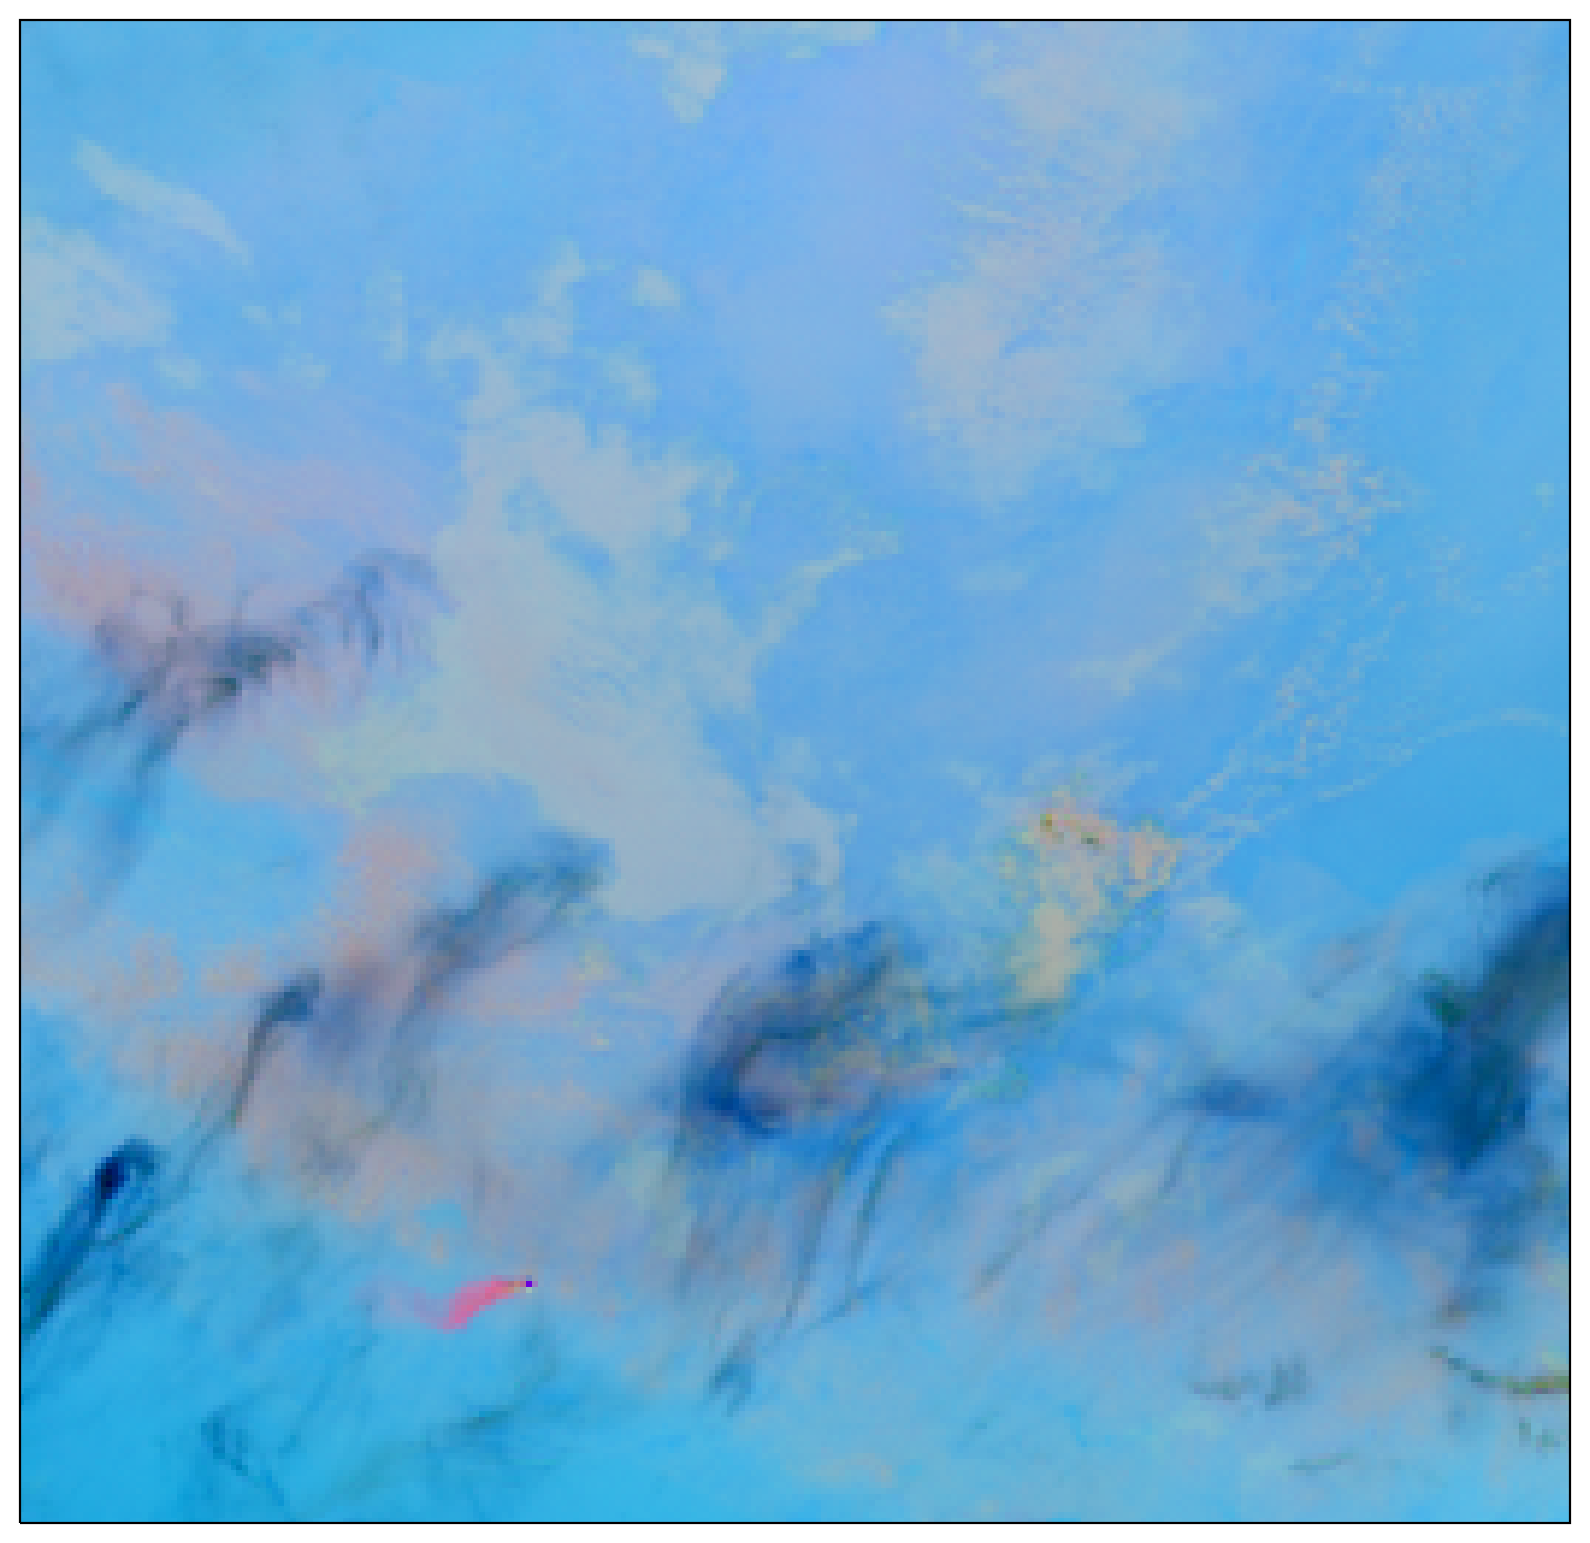

In [42]:
fig = plt.figure(figsize=(10, 10), dpi=200)
ax = fig.add_subplot(1, 1, 1, projection=projPC)
ax.set_extent([-92.54329965262795, -87.75789946281134, 13.722964636986774, 18.60105315166329]) # enfoque a guatemala
img = ax.imshow(var, extent=(var.x[0], var.x[-1], var.y[-1], var.y[0]), origin='upper')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


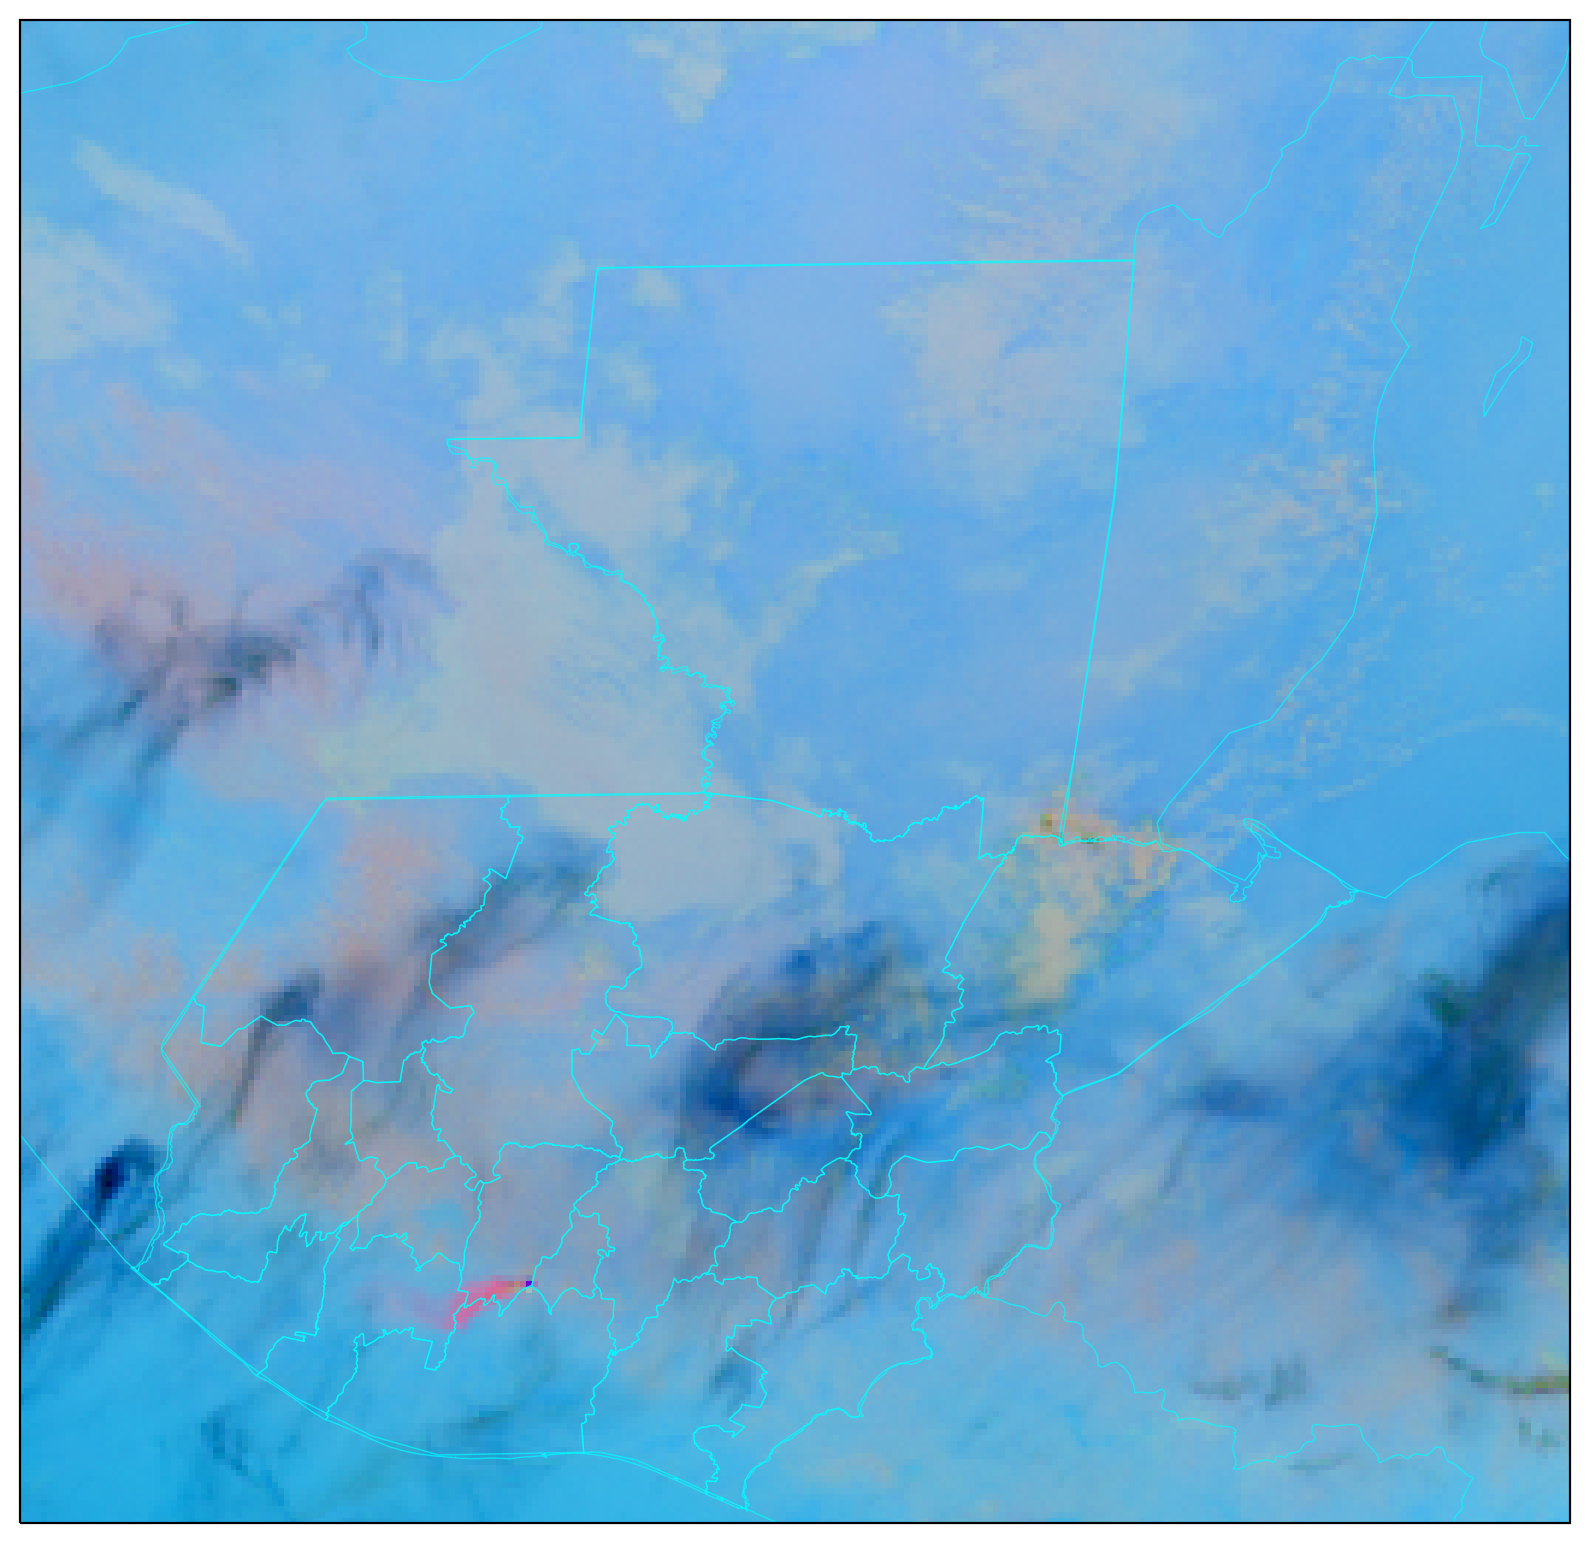

In [43]:
from cartopy import feature as cfeature
import cartopy.io.shapereader as shpreader

# Departamentos guatemala IGN
fname = './shp/departamentos_gtm_new.shp'
depa_shapes = list(shpreader.Reader(fname).geometries())

fig = plt.figure(figsize=(10, 10), dpi=200)
ax = fig.add_subplot(1, 1, 1, projection=projPC)

ax.add_geometries(depa_shapes, crs=ccrs.PlateCarree(), #ax is already projected, so we use the closest to an identity projection when adding things on top of it
                     edgecolor='cyan', facecolor='none', alpha=0.7, zorder=3, linewidth=0.5) 

cborders = ax.add_feature(cfeature.BORDERS, edgecolor='cyan', alpha=0.7, linewidth=0.5)
ax.coastlines(resolution='50m', color='cyan', alpha=0.7, linewidth=0.5) 

ax.set_extent([-92.54329965262795, -87.75789946281134, 13.722964636986774, 18.60105315166329]) # enfoque a guatemala
img = ax.imshow(var, extent=(var.x[0], var.x[-1], var.y[-1], var.y[0]), origin='upper')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 640x480 with 0 Axes>

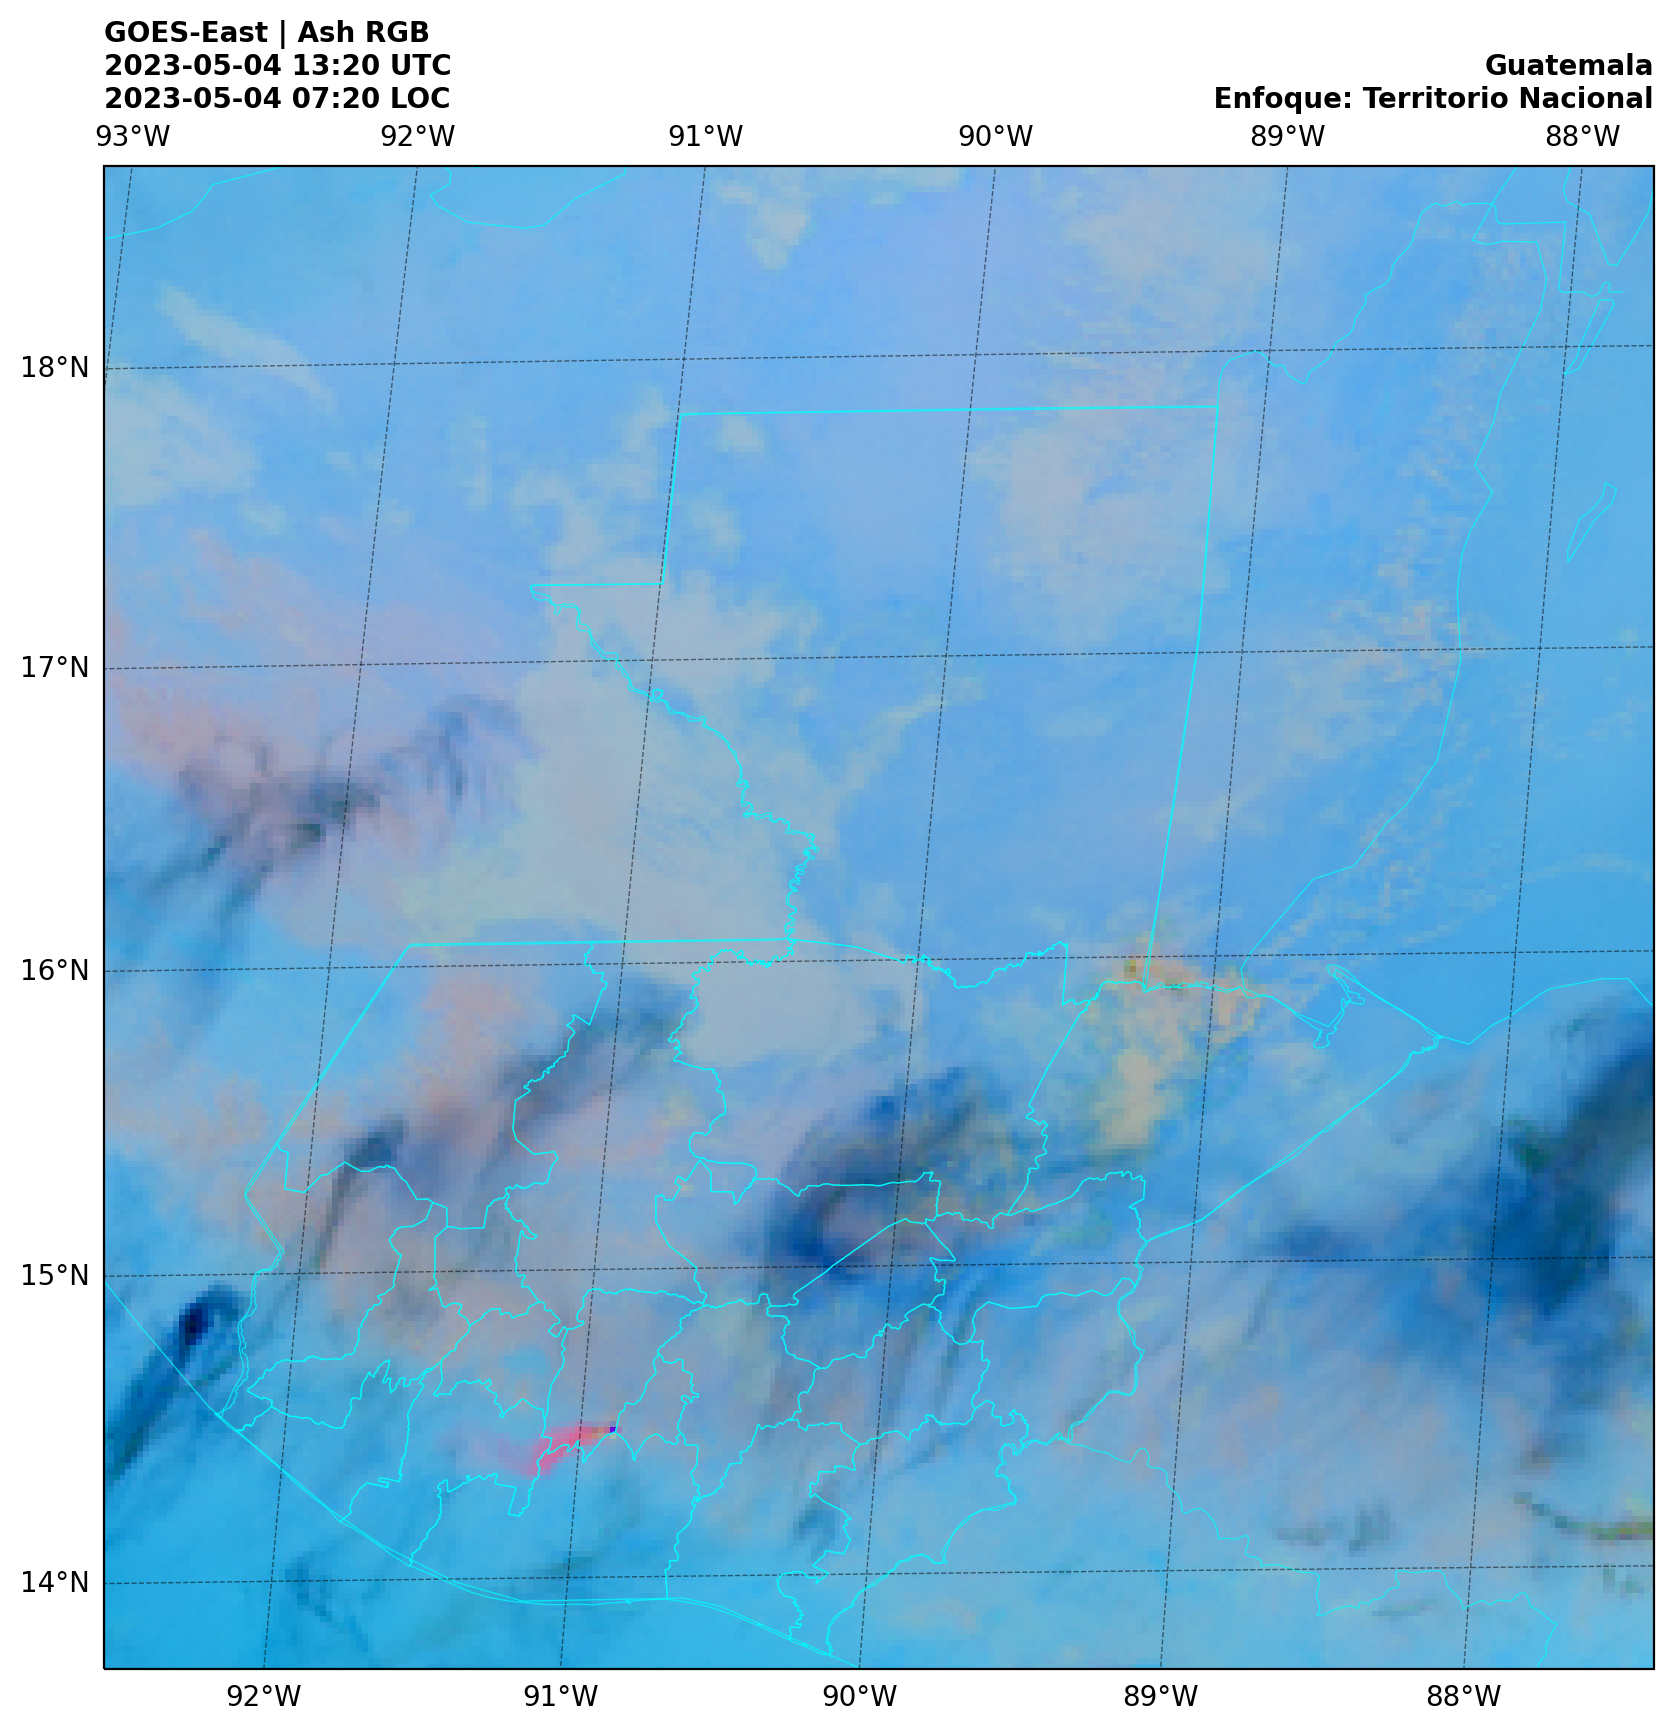

In [45]:
del fig
del ax

plt.figure().clear()
plt.close()
plt.cla()
plt.clf()

import matplotlib.colors as colors

fig = plt.figure(figsize=(10, 10), dpi=200)
ax = fig.add_subplot(1, 1, 1, projection=projPC)

ax.set_extent([-92.54329965262795, -87.75789946281134, 13.722964636986774, 18.60105315166329]) # enfoque a guatemala

plt.title(f"{strs['orbital_slot']} | Ash RGB\n{(strs['end_time'] + dt.timedelta(minutes=1)):%Y-%m-%d %H:%M} UTC\n{(strs['end_time'] - dt.timedelta(hours=5 , minutes=59)):%Y-%m-%d %H:%M} LOC", fontweight='bold', fontsize=10,   loc='left')
plt.title(f"Guatemala\n Enfoque: Territorio Nacional", fontweight='bold', fontsize=10, loc='right')

# Departamentos guatemala IGN
fname = './shp/departamentos_gtm_new.shp'
depa_shapes = list(shpreader.Reader(fname).geometries())

ax.add_geometries(depa_shapes, crs=ccrs.PlateCarree(), #ax is already projected, so we use the closest to an identity projection when adding things on top of it
                     edgecolor='cyan', facecolor='none', alpha=0.7, zorder=3, linewidth=0.5) 

img = ax.imshow(var, extent=(var.x[0], var.x[-1], var.y[-1], var.y[0]), origin='upper')

cborders = ax.add_feature(cfeature.BORDERS, edgecolor='cyan', alpha=0.7, linewidth=0.5)
ax.coastlines(resolution='50m', color='cyan', alpha=0.7, linewidth=0.5) 


gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='black', alpha=0.5, linestyle='--')
gl.ylabels_right = False

plt.show()
